# Module 5 - Time Series

In [7]:
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

### Numpy datetime

In [8]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [9]:
type(date)

numpy.ndarray

In [10]:
#creates 12 consecutive dates starting from July 4, 2015
arrayDate = date + np.arange(12)

In [11]:
print(arrayDate)

['2015-07-04' '2015-07-05' '2015-07-06' '2015-07-07' '2015-07-08'
 '2015-07-09' '2015-07-10' '2015-07-11' '2015-07-12' '2015-07-13'
 '2015-07-14' '2015-07-15']


In [12]:
#day-based datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [13]:
#minute-based datetime
#sets to time zone of local computer
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

### Pandas datetime

In [14]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [15]:
#output day of the week
date.strftime('%A')

'Saturday'

In [16]:
#create 12 consecutive dates starting from July 4, 2015
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [17]:
#make index using timestamp
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])

data = pd.Series([0,1,2,3], index=index) #a series is a singular column from a dataframe
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [18]:
#can slice date index similarly to regular index slicing
#includes ending index
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [19]:
#get rows from 2015
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [20]:
#will convert different formats into datetime
dates = pd.to_datetime([datetime(2015,7,3),'4th of July 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [21]:
#assigned a 'day' frequency
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [22]:
#calculate # of days between 07-03-2015 and each date
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [23]:
#create days between start date and end date
#default frequency is 'day'
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [24]:
#create days from start date with periods (how many)
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [25]:
#make range using hourly frequency
#default start at 00:00 (midnight)
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [26]:
#create period frequency by month
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [27]:
#create only hour frequencies (no date attached)
#seconds also included
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [28]:
#create 2 hour 30 minute intervals
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [29]:
#create business day offsets
from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Visualize time series data

In [41]:
#make dates the index
#format dates as we load the data
data = pd.read_csv('datasets/FremontBridgeBicycle.csv', index_col="Date", parse_dates=True)
data.tail()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2018-10-31 19:00:00,23.0,58.0
2018-10-31 20:00:00,16.0,31.0
2018-10-31 21:00:00,15.0,19.0
2018-10-31 22:00:00,12.0,15.0
2018-10-31 23:00:00,9.0,11.0


In [44]:
data['Fremont Bridge East Sidewalk'].max()

717.0

In [31]:
data.describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,53271.000000,53271.000000
mean,57.434401,54.368549
std,82.795998,71.282743
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,30.000000
75%,70.000000,72.000000
max,717.000000,698.000000


In [51]:
#rename columns with shorter name
#create a new column 'Total' with combined values of west and east columns
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [33]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


Text(0, 0.5, 'Hourly Bicycle Count')

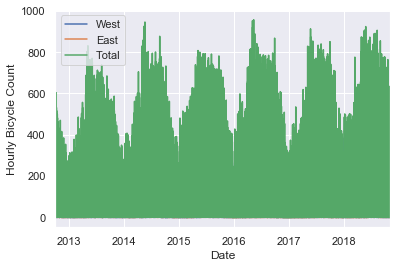

In [34]:
#bar plot of data
#plt.subplots(figsize=(6,7))
data.plot()
plt.ylabel('Hourly Bicycle Count')

In [47]:
weekly = data.resample('W').sum()
weekly


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-07,6995.0,7297.0
2012-10-14,8116.0,8679.0
2012-10-21,7563.0,7946.0
2012-10-28,6536.0,6901.0
2012-11-04,5786.0,6408.0
2012-11-11,7275.0,7741.0
2012-11-18,5799.0,6077.0
2012-11-25,3316.0,3534.0
2012-12-02,5659.0,5875.0


,West,East,Total
Date,,,
2012-10-31,31931.0,33764.0,65695.0
2012-11-30,24585.0,26062.0,50647.0
2012-12-31,17761.0,18608.0,36369.0
2013-01-31,21974.0,22910.0,44884.0
2013-02-28,24129.0,25898.0,50027.0
2013-03-31,31646.0,34443.0,66089.0
2013-04-30,34695.0,37303.0,71998.0
2013-05-31,51737.0,56837.0,108574.0
2013-06-30,47841.0,51439.0,99280.0


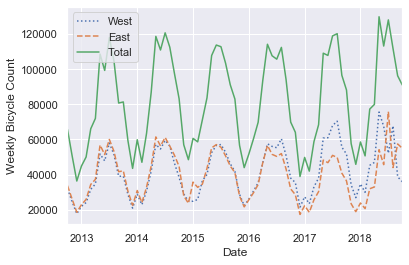

In [59]:
monthly = data.resample('M').sum()
monthly.plot(style=[':', '--', '-']) #line styles for each feature
plt.ylabel('Weekly Bicycle Count')
monthly

In [62]:
weekly.head(20)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-07,6995.0,7297.0
2012-10-14,8116.0,8679.0
2012-10-21,7563.0,7946.0
2012-10-28,6536.0,6901.0
2012-11-04,5786.0,6408.0
2012-11-11,7275.0,7741.0
2012-11-18,5799.0,6077.0
2012-11-25,3316.0,3534.0
2012-12-02,5659.0,5875.0


Text(0, 0.5, 'Weekly Bicycle Count')

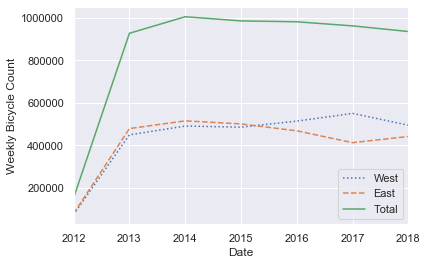

In [66]:

yearly.plot(style=[':', '--', '-']) #line styles for each feature
plt.ylabel('Weekly Bicycle Count')


In [65]:
yearly['West'].sum()

3059588.0

Text(0, 0.5, 'Weekly Bicycle Count')

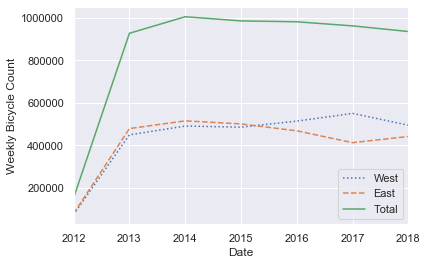

In [100]:
#hourly intervals are too narrow to make sense of data
#aggregate as weekly data instead
weekly = data.resample('Y').sum()
weekly.plot(style=[':', '--', '-']) #line styles for each feature
plt.ylabel('Weekly Bicycle Count')

People tend to bike more in the summers than in the winters

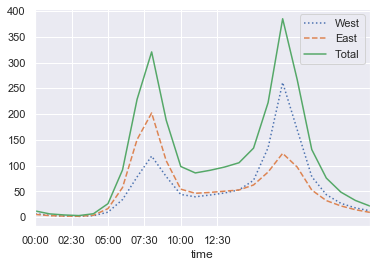

In [98]:
#see what an average day looks like
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 3*60*50*np.arange(6) #6 intervals of 4 hours
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

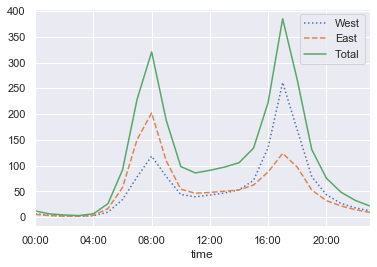

In [58]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6) #6 intervals of 4 hours
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

Bike usage peaks around 8am and 5pm

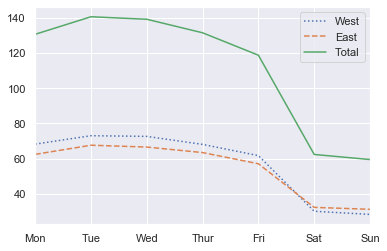

In [68]:
#What does bike usage look like by day of the week?
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':','--','-'])

In [73]:
weekdays = by_weekday[0:5]
weekdays

,West,East,Total
Mon,68.231730,62.413118,130.644848
Tue,73.011307,67.605180,140.616487
Wed,72.623821,66.558176,139.181997
Thur,68.074395,63.418638,131.493034
Fri,61.687221,57.070076,118.757297


Bike usage is highest during weekdays and drops off on weekends

In [76]:
weekends = by_weekday[5:7]
weekends

,West,East,Total
Sat,30.073475,32.284043,62.357518
Sun,28.276996,31.181113,59.458109


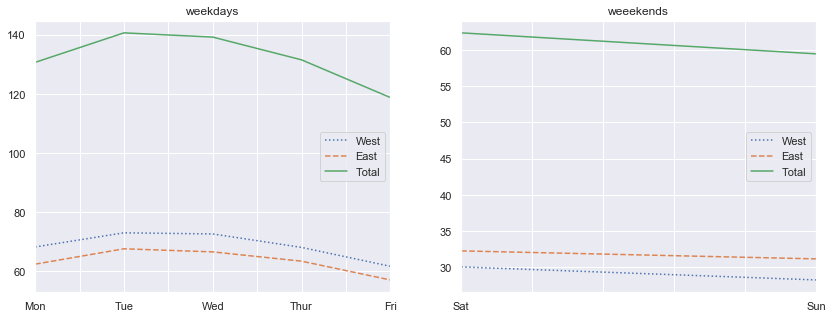

In [83]:
fig, ax = plt.subplots(1, 2, figsize =(14, 5))
weekdays.plot(ax=ax[0], title = 'weekdays', style=[':','--','-'])
weekends.plot(ax=ax[1], title = 'weeekends', style=[':', '--', '-'])

In [67]:
#set conditions to show hourly trend on weekdays vs weekends
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

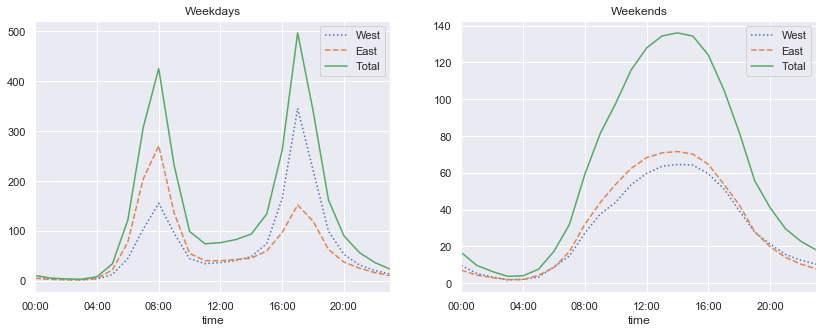

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);